In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Goal: Predict whether a student will PASS (1) or FAIL (0) the exam.
# Inputs (features): study_hours, attendance, previous_score
# Output (label): pass_exam

In [3]:
data = {
    "study_hours":      [1, 2, 3, 4, 5, 6, 2, 3, 7, 8, 1, 5, 4, 6, 7, 3, 2, 8, 9, 4],
    "attendance_pct":   [50, 60, 65, 70, 75, 80, 55, 60, 85, 90, 40, 78, 72, 88, 92, 66, 58, 95, 96, 70],
    "previous_score":   [35, 40, 45, 50, 55, 60, 38, 42, 70, 75, 30, 58, 52, 72, 78, 46, 41, 82, 85, 50],
    # 1 = pass, 0 = fail (our label)
    "pass_exam":        [0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1]
}

In [4]:
df = pd.DataFrame(data)
print("First few rows of the dataset:")
print(df.tail())

First few rows of the dataset:
    study_hours  attendance_pct  previous_score  pass_exam
15            3              66              46          0
16            2              58              41          0
17            8              95              82          1
18            9              96              85          1
19            4              70              50          1


In [5]:
# Clean Data
print("\nChecking for missing values:")
print(df.isna().sum())


Checking for missing values:
study_hours       0
attendance_pct    0
previous_score    0
pass_exam         0
dtype: int64


In [6]:
# Remove duplicates (if any)
df = df.drop_duplicates()

In [7]:
# Feature Engineering ===== Very important 
df["study_efficiency"] = df["previous_score"] / df["study_hours"]

print("Data with engineered feature (study_efficiency):")
print(df.head())

Data with engineered feature (study_efficiency):
   study_hours  attendance_pct  previous_score  pass_exam  study_efficiency
0            1              50              35          0              35.0
1            2              60              40          0              20.0
2            3              65              45          0              15.0
3            4              70              50          0              12.5
4            5              75              55          1              11.0


In [8]:
# Separate features (X) and label (y)
feature_cols = ["study_hours", "attendance_pct", "previous_score", "study_efficiency"]
X = df[feature_cols]
y = df["pass_exam"]

In [9]:
# Train / Validation / Test Split
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42, stratify=y
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.1765, random_state=42, stratify=y_temp
)
# 0.1765 of 85% ≈ 15% of total, so we get ~70/15/15

print(f"\nTrain size: {len(X_train)}, Validation size: {len(X_val)}, Test size: {len(X_test)}")


Train size: 13, Validation size: 4, Test size: 3


In [10]:
#Select Model & Build Pipeline

model = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression())
])

In [11]:
# Train the Model

model.fit(X_train, y_train)

# Evaluate on validation set (used to tune hyperparameters in real projects)
y_val_pred = model.predict(X_val)

In [12]:
print("\nValidation performance:")
print(confusion_matrix(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred, digits=3))


Validation performance:
[[2 0]
 [0 2]]
              precision    recall  f1-score   support

           0      1.000     1.000     1.000         2
           1      1.000     1.000     1.000         2

    accuracy                          1.000         4
   macro avg      1.000     1.000     1.000         4
weighted avg      1.000     1.000     1.000         4



In [13]:
# Final evaluation on the unseen test set
y_test_pred = model.predict(X_test)

print("\nTest performance (on unseen data):")
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred, digits=3))


Test performance (on unseen data):
[[1 0]
 [0 2]]
              precision    recall  f1-score   support

           0      1.000     1.000     1.000         1
           1      1.000     1.000     1.000         2

    accuracy                          1.000         3
   macro avg      1.000     1.000     1.000         3
weighted avg      1.000     1.000     1.000         3



In [14]:
# Deploy / Monitor (Simulation)
# ==============================
# For demo, we'll simulate "deployment" by predicting for a new student.

new_student = pd.DataFrame({
    "study_hours":      [5],
    "attendance_pct":   [80],
    "previous_score":   [55],
    "study_efficiency": [55/5]
})

prediction = model.predict(new_student)[0]
proba = model.predict_proba(new_student)[0, 1]  # probability of passing

In [15]:
print("\nNew student data:")
print(new_student)

print(f"\nModel prediction (1 = pass, 0 = fail): {prediction}")
print(f"Predicted probability of passing: {proba:.2f}")


New student data:
   study_hours  attendance_pct  previous_score  study_efficiency
0            5              80              55              11.0

Model prediction (1 = pass, 0 = fail): 1
Predicted probability of passing: 0.83


#### Pandas

pandas is a Python library for working with tabular data (like Excel sheets, CSV files, databases).

Think of it like: Excel inside Python — but faster, smarter, and programmable.

In [100]:
import pandas as pd

# Load CSV
df = pd.read_csv("test.csv")

# Show first rows
print(df.head())
# print(df.tail())

# Average marks
print("\n \n", df["Salary"].mean())

      Name             Domain  Salary
0  Santosh     Java Developer     350
1     Arun      Data Engineer     400
2  Keerthi  Blockchain Tester     450

 
 400.0


#### Numpy

NumPy is used for fast mathematical operations.
pandas and scikit-learn internally rely on it.

NumPy is mainly used when:

+ doing matrix operations
+ building ML models
+ handling numeric data efficiently

In [19]:
import numpy as np

arr = np.array([1, 2, 3, 4, 5])

print(arr.mean())     # average
print(arr * 10)       # multiply all numbers

3.0
[10 20 30 40 50]


#### scikit-learn

Machine learning toolkit

A library to easily build ML models like:

+ Linear Regression
+ Decision Trees
+ Classification models
+ Clustering
+ Model evaluation

Think of it like:
“Ready-made ML algorithms — just plug in data”.

##### Google Colab / Jupyter

How they work together in ML

Typical ML workflow:

1. Load data → pandas
2. Do math → NumPy
3. Train model → scikit-learn
4. Run everything → Jupyter / Colab

In [22]:
import pandas as pd
import numpy as np

data = [
    {"Name": "Ravi",   "Age": 25, "City": "Bangalore", "Salary": 40000,  "Gender": "Male",   "Experience": 2},
    {"Name": "Priya",  "Age": np.nan, "City": "Chennai",   "Salary": 55000,  "Gender": "Female", "Experience": 4},
    {"Name": "Amit",   "Age": 30, "City": "Bangalore", "Salary": np.nan, "Gender": "Male",   "Experience": 5},
    {"Name": "Sneha",  "Age": 28, "City": None,       "Salary": 70000,  "Gender": "Female", "Experience": 3},
    {"Name": "Ravi",   "Age": 25, "City": "Bangalore", "Salary": 40000,  "Gender": "Male",   "Experience": 2},  # duplicate
    {"Name": "Vikram", "Age": 35, "City": "Delhi",    "Salary": 500000, "Gender": "Male",   "Experience": 10}, # outlier salary
]

df = pd.DataFrame(data)
print(df)

     Name   Age       City    Salary  Gender  Experience
0    Ravi  25.0  Bangalore   40000.0    Male           2
1   Priya   NaN    Chennai   55000.0  Female           4
2    Amit  30.0  Bangalore       NaN    Male           5
3   Sneha  28.0       None   70000.0  Female           3
4    Ravi  25.0  Bangalore   40000.0    Male           2
5  Vikram  35.0      Delhi  500000.0    Male          10


##### Detect missing values

In [23]:
print("Missing values per column:")
print(df.isna().sum())

Missing values per column:
Name          0
Age           1
City          1
Salary        1
Gender        0
Experience    0
dtype: int64


In [24]:
df1 = df
df2 = df

##### Here we drop rows with NULL values

In [106]:
df_dropna = df1.dropna()
print(df_dropna)

     Name   Age       City    Salary Gender  Experience
0    Ravi  25.0  Bangalore   40000.0   Male           2
4    Ravi  25.0  Bangalore   40000.0   Male           2
5  Vikram  35.0      Delhi  500000.0   Male          10


##### Replace NULL values with average values

In [48]:
df_imputed = df.copy()

# Fill missing Age with mean age
mean_age = df_imputed["Age"].mean()
df_imputed["Age"].fillna(mean_age, inplace=True)

# Fill missing Salary with mean salary
mean_salary = df_imputed["Salary"].mean()
df_imputed["Salary"].fillna(mean_salary, inplace=True)

print(df_imputed)

     Name   Age       City    Salary  Gender  Experience
0    Ravi  25.0  Bangalore   40000.0    Male           2
1   Priya  28.6    Chennai   55000.0  Female           4
2    Amit  30.0  Bangalore  141000.0    Male           5
3   Sneha  28.0       None   70000.0  Female           3
4    Ravi  25.0  Bangalore   40000.0    Male           2
5  Vikram  35.0      Delhi  500000.0    Male          10


C:\Users\LotusBlue\AppData\Local\Temp\ipykernel_28040\1916369071.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_imputed["Age"].fillna(mean_age, inplace=True)
C:\Users\LotusBlue\AppData\Local\Temp\ipykernel_28040\1916369071.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


In [50]:
# Fill City with most frequent value (mode)
mode_city = df_imputed["City"].mode()[0]
df_imputed["City"].fillna(mode_city, inplace=True)

print(df_imputed)

     Name   Age       City    Salary  Gender  Experience
0    Ravi  25.0  Bangalore   40000.0    Male           2
1   Priya  28.6    Chennai   55000.0  Female           4
2    Amit  30.0  Bangalore  141000.0    Male           5
3   Sneha  28.0  Bangalore   70000.0  Female           3
4    Ravi  25.0  Bangalore   40000.0    Male           2
5  Vikram  35.0      Delhi  500000.0    Male          10


C:\Users\LotusBlue\AppData\Local\Temp\ipykernel_28040\1162166174.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_imputed["City"].fillna(mode_city, inplace=True)


In [60]:
print("Number of duplicate rows:", df_imputed.duplicated().sum())
print(df_imputed[df_imputed.duplicated()])

# Number of duplicate rows 
print("Number of duplicate rows:", df_imputed.duplicated().sum())
print(df_imputed[df_imputed.duplicated()])

print(" \n \n Droping duplicate rows now")
# Drop duplicate rows 
df_nodup = df_imputed.drop_duplicates()
print(df_nodup)

Number of duplicate rows: 1
   Name   Age       City   Salary Gender  Experience
4  Ravi  25.0  Bangalore  40000.0   Male           2
Number of duplicate rows: 1
   Name   Age       City   Salary Gender  Experience
4  Ravi  25.0  Bangalore  40000.0   Male           2
 
 
 Droping duplicate rows now
     Name   Age       City    Salary  Gender  Experience
0    Ravi  25.0  Bangalore   40000.0    Male           2
1   Priya  28.6    Chennai   55000.0  Female           4
2    Amit  30.0  Bangalore  141000.0    Male           5
3   Sneha  28.0  Bangalore   70000.0  Female           3
5  Vikram  35.0      Delhi  500000.0    Male          10


In [62]:
print(df_nodup["Salary"].describe())

count         5.0000
mean     161200.0000
std      193312.4414
min       40000.0000
25%       55000.0000
50%       70000.0000
75%      141000.0000
max      500000.0000
Name: Salary, dtype: float64


In [64]:
# Detect outliers using IQR (Interquartile Range) method

Q1 = df_nodup["Salary"].quantile(0.25)
Q3 = df_nodup["Salary"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)

outliers = df_nodup[(df_nodup["Salary"] < lower_bound) | (df_nodup["Salary"] > upper_bound)]
print("Outliers:\n", outliers)


Lower bound: -74000.0
Upper bound: 270000.0
Outliers:
      Name   Age   City    Salary Gender  Experience
5  Vikram  35.0  Delhi  500000.0   Male          10


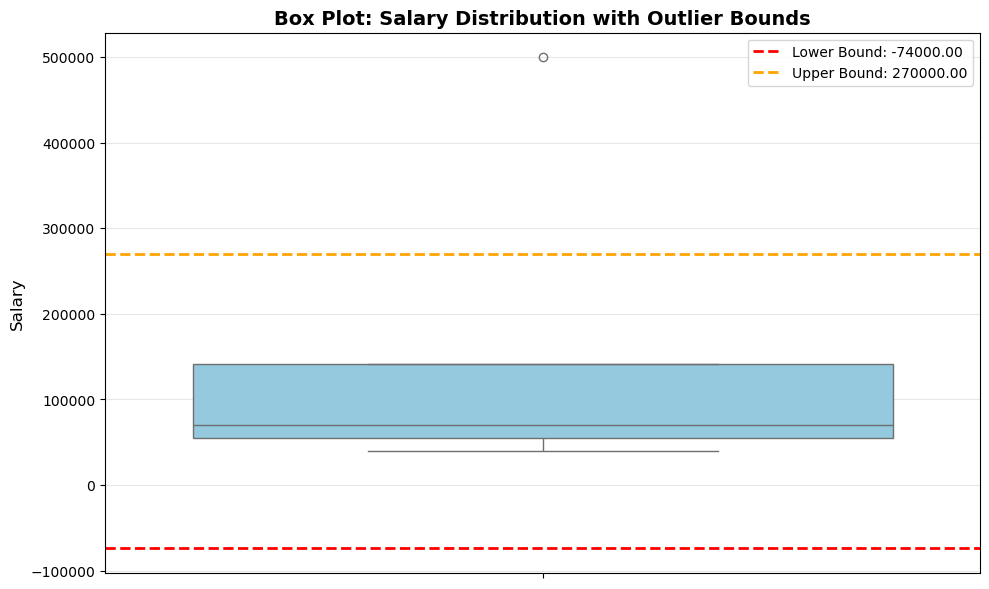

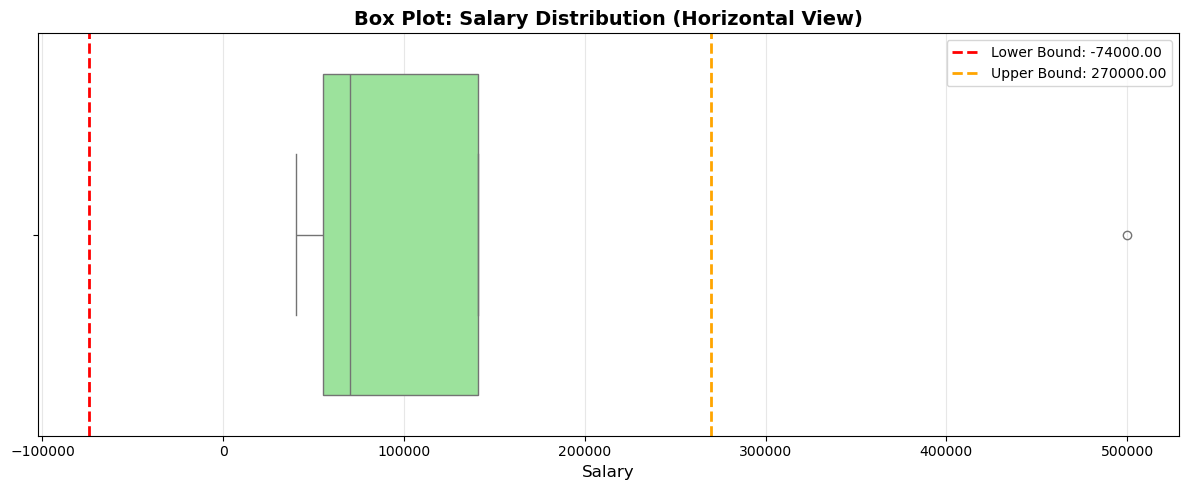

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create box plot
plt.figure(figsize=(10, 6))
sns.boxplot(y=df_nodup["Salary"], color='skyblue')

# Add horizontal lines for bounds
plt.axhline(y=lower_bound, color='red', linestyle='--', linewidth=2, label=f'Lower Bound: {lower_bound:.2f}')
plt.axhline(y=upper_bound, color='orange', linestyle='--', linewidth=2, label=f'Upper Bound: {upper_bound:.2f}')

plt.title('Box Plot: Salary Distribution with Outlier Bounds', fontsize=14, fontweight='bold')
plt.ylabel('Salary', fontsize=12)
plt.legend(loc='best')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Optional: Create a horizontal box plot for better readability
plt.figure(figsize=(12, 5))
sns.boxplot(x=df_nodup["Salary"], color='lightgreen')

plt.axvline(x=lower_bound, color='red', linestyle='--', linewidth=2, label=f'Lower Bound: {lower_bound:.2f}')
plt.axvline(x=upper_bound, color='orange', linestyle='--', linewidth=2, label=f'Upper Bound: {upper_bound:.2f}')

plt.title('Box Plot: Salary Distribution (Horizontal View)', fontsize=14, fontweight='bold')
plt.xlabel('Salary', fontsize=12)
plt.legend(loc='best')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

In [66]:
# Remove rows with outlier salaries

df_no_outliers = df_nodup[(df_nodup["Salary"] >= lower_bound) & (df_nodup["Salary"] <= upper_bound)]
print(df_no_outliers)


    Name   Age       City    Salary  Gender  Experience
0   Ravi  25.0  Bangalore   40000.0    Male           2
1  Priya  28.6    Chennai   55000.0  Female           4
2   Amit  30.0  Bangalore  141000.0    Male           5
3  Sneha  28.0  Bangalore   70000.0  Female           3


In [71]:
# Cap (clip) the outliers

df_capped = df_nodup.copy()
df_capped["Salary"] = df_capped["Salary"].clip(lower=lower_bound, upper=upper_bound)
print(df_capped)


     Name   Age       City    Salary  Gender  Experience
0    Ravi  25.0  Bangalore   40000.0    Male           2
1   Priya  28.6    Chennai   55000.0  Female           4
2    Amit  30.0  Bangalore  141000.0    Male           5
3   Sneha  28.0  Bangalore   70000.0  Female           3
5  Vikram  35.0      Delhi  270000.0    Male          10


#### Scaling & Normalization

In [74]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

numeric_cols = ["Salary", "Experience"]
X = df_no_outliers[numeric_cols]

print("Original numeric data:\n", X)

Original numeric data:
      Salary  Experience
0   40000.0           2
1   55000.0           4
2  141000.0           5
3   70000.0           3


In [80]:
# Standardization (Z-score scaling)
scaler_std = StandardScaler()
X_std = scaler_std.fit_transform(X)

df_std = df_no_outliers.copy()
df_std[["Salary_std", "Experience_std"]] = X_std

print(df_std[["Salary", "Experience", "Salary_std", "Experience_std"]])

     Salary  Experience  Salary_std  Experience_std
0   40000.0           2   -0.942662       -1.341641
1   55000.0           4   -0.555266        0.447214
2  141000.0           5    1.665799        1.341641
3   70000.0           3   -0.167871       -0.447214


In [84]:
#Min-Max Normalization (0–1 scaling)

scaler_mm = MinMaxScaler()
X_mm = scaler_mm.fit_transform(X)

df_mm = df_no_outliers.copy()
df_mm[["Salary_mm", "Experience_mm"]] = X_mm

print(df_mm[["Salary", "Experience", "Salary_mm", "Experience_mm"]])

     Salary  Experience  Salary_mm  Experience_mm
0   40000.0           2   0.000000       0.000000
1   55000.0           4   0.148515       0.666667
2  141000.0           5   1.000000       1.000000
3   70000.0           3   0.297030       0.333333


##### Encoding Categorical Values (Text > Numbers)

In [88]:
cat_df = df_no_outliers.copy()
print(cat_df[["Name", "City", "Gender"]])

    Name       City  Gender
0   Ravi  Bangalore    Male
1  Priya    Chennai  Female
2   Amit  Bangalore    Male
3  Sneha  Bangalore  Female


In [90]:
from sklearn.preprocessing import LabelEncoder

le_gender = LabelEncoder()
cat_df["Gender_label"] = le_gender.fit_transform(cat_df["Gender"])

print(cat_df[["Gender", "Gender_label"]])
print("Classes mapping:", dict(zip(le_gender.classes_, le_gender.transform(le_gender.classes_))))

   Gender  Gender_label
0    Male             1
1  Female             0
2    Male             1
3  Female             0
Classes mapping: {'Female': 0, 'Male': 1}


In [92]:
df_onehot = pd.get_dummies(df_no_outliers, columns=["City", "Gender"], drop_first=False)
print(df_onehot)

    Name   Age    Salary  Experience  City_Bangalore  City_Chennai  \
0   Ravi  25.0   40000.0           2            True         False   
1  Priya  28.6   55000.0           4           False          True   
2   Amit  30.0  141000.0           5            True         False   
3  Sneha  28.0   70000.0           3            True         False   

   Gender_Female  Gender_Male  
0          False         True  
1           True        False  
2          False         True  
3           True        False  
